## Description about this notebook
This notebook is designed to visually compare the performance of our three different YOLO NAS models (Small, Medium, Large) in terms of two key metrics: Mean Average Precision at 50% (MAP50) and Mean Average Precision from 50% to 95% (MAP50:95). We employed a supervision function for this evaluation. The assessment was carried out on a test dataset, which was not previously exposed to the models. This test dataset We used is unseen by the model and we use out old dataset (holistain cow with one side camera angle). 

In [1]:
import os
from ultralytics import NAS
os.chdir("..")
ROOT = os.getcwd()
print(ROOT)


/Users/mautushid/github/Cowsformer


In [2]:
from models.nas import *
import pandas as pd
import matplotlib.pyplot as plt

The console stream is logged into /Users/mautushid/sg_logs/console.log


[2024-01-25 21:17:01] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-01-25 21:17:02] WARNING - __init__.py - Failed to import pytorch_quantization
[2024-01-25 21:17:02] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
[2024-01-25 21:17:11] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-01-25 21:17:11] WARNING - export.py - Failed to import pytorch_quantization
[2024-01-25 21:17:11] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2024-01-25 21:17:11] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


In [11]:
path_model = 'yolo_nas_m' 
dir_train = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/train"
dir_val = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/val"
dir_test = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/test_old"
name_task = "cow200"

data_yaml_path = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/data.yaml"
finetuned_model_path_m_10 = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_10/n10_yolo_na_i1_exp_yolo_nas_m_10_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_10/n10_yolo_na_i2_exp_yolo_nas_m_10_2/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_10/n10_yolo_na_i3_exp_yolo_nas_m_10_3/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_10/n10_yolo_na_i4_exp_yolo_nas_m_10_4/ckpt_best.pth"]


finetuned_model_path_m_25 = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_25/n25_yolo_na_i1_exp_yolo_nas_m_25_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_25/n25_yolo_na_i2_exp_yolo_nas_m_25_2/ckpt_best.pth", 
                         "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_25/n25_yolo_na_i3_exp_yolo_nas_m_25_3/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_25/n25_yolo_na_i4_exp_yolo_nas_m_25_4/ckpt_best.pth"]

finetuned_model_path_m_50 = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_50/n50_yolo_na_i1_exp_yolo_nas_m_50_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_50/n50_yolo_na_i2_exp_yolo_nas_m_50_2/ckpt_best.pth", 
                         "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_50/n50_yolo_na_i3_exp_yolo_nas_m_50_3/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_50/n50_yolo_na_i4_exp_yolo_nas_m_50_4/ckpt_best.pth"]

finetuned_model_path_m_100 = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_100/n100_yolo_na_i1_exp_yolo_nas_m_100_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_100/n100_yolo_na_i2_exp_yolo_nas_m_100_2/ckpt_best.pth", 
                         "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_100/n100_yolo_na_i3_exp_yolo_nas_m_100_3/ckpt_best.pth"]


finetuned_model_path_m_200 = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_200/n200_yolo_na_i1_exp_yolo_nas_m_200_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_200/n200_yolo_na_i2_exp_yolo_nas_m_200_2/ckpt_best.pth", 
                         "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_200/n200_yolo_na_i3_exp_yolo_nas_m_200_3/ckpt_best.pth"]

### Creating instance of Niche_YOLO_NAS class
my_nas = Niche_YOLO_NAS(path_model, dir_train, dir_val, dir_test, name_task)

[2024-01-25 21:41:31] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-01-25 21:41:31] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_m


In [12]:
# Assuming my_nas is an instance of Niche_YOLO_NAS with methods load() and get_map_scores()
# and that path_model, data_yaml_path, and finetuned_model_path_m_* variables are defined as shown before

# Lists to hold evaluation results for each dataset size
evaluation_results_m_10 = []
evaluation_results_m_25 = []
evaluation_results_m_50 = []
evaluation_results_m_100 = []
evaluation_results_m_200 = []

# Function to process a list of models
def evaluate_models(finetuned_model_paths):
    models = []
    evaluation_results = []
    
    # Load models
    for path in finetuned_model_paths:
        model = my_nas.load(path_model, path)
        models.append(model)
    
    # Evaluate models
    for model in models:
        metrics = my_nas.get_map_scores(model, data_yaml_path, "test")
        evaluation_results.append(metrics)
    
    return evaluation_results

# Evaluate models fine-tuned with different dataset sizes
evaluation_results_m_10 = evaluate_models(finetuned_model_path_m_10)
evaluation_results_m_25 = evaluate_models(finetuned_model_path_m_25)
evaluation_results_m_50 = evaluate_models(finetuned_model_path_m_50)
evaluation_results_m_100 = evaluate_models(finetuned_model_path_m_100)
evaluation_results_m_200 = evaluate_models(finetuned_model_path_m_200)

# Now you have evaluation results for each dataset size
# You can calculate averages, plot results, etc., using these lists of dictionaries or DataFrames


[2024-01-25 21:41:33] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_10/n10_yolo_na_i1_exp_yolo_nas_m_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 21:41:35] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_10/n10_yolo_na_i2_exp_yolo_nas_m_10_2/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 21:41:36] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_10/n10_yolo_na_i3_exp_yolo_nas_m_10_3/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 21:41:37] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_10/n10_yolo_na_i4_exp_yolo_nas_m_10_4/ckpt_best.pth EMA checkpoint.
[2024-01-25 21:41:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


model yolo_nas_m loaded


[2024-01-25 21:41:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:41:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:41:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:41:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:41:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:41:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:41:40] INFO -

model yolo_nas_m loaded


[2024-01-25 21:43:07] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_25/n25_yolo_na_i2_exp_yolo_nas_m_25_2/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 21:43:08] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_25/n25_yolo_na_i3_exp_yolo_nas_m_25_3/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 21:43:10] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_25/n25_yolo_na_i4_exp_yolo_nas_m_25_4/ckpt_best.pth EMA checkpoint.
[2024-01-25 21:43:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


model yolo_nas_m loaded


[2024-01-25 21:43:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:43:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:43:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:43:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:43:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:43:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:43:13] INFO -

model yolo_nas_m loaded


[2024-01-25 21:44:38] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_50/n50_yolo_na_i2_exp_yolo_nas_m_50_2/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 21:44:39] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_50/n50_yolo_na_i3_exp_yolo_nas_m_50_3/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 21:44:40] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_50/n50_yolo_na_i4_exp_yolo_nas_m_50_4/ckpt_best.pth EMA checkpoint.
[2024-01-25 21:44:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


model yolo_nas_m loaded


[2024-01-25 21:44:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:44:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:44:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:44:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:44:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:44:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:44:43] INFO -

model yolo_nas_m loaded


[2024-01-25 21:46:04] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_100/n100_yolo_na_i2_exp_yolo_nas_m_100_2/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 21:46:06] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_100/n100_yolo_na_i3_exp_yolo_nas_m_100_3/ckpt_best.pth EMA checkpoint.
[2024-01-25 21:46:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


model yolo_nas_m loaded


[2024-01-25 21:46:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:46:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:46:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:46:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:46:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:46:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:46:09] INFO -

model yolo_nas_m loaded


[2024-01-25 21:47:12] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_200/n200_yolo_na_i2_exp_yolo_nas_m_200_2/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 21:47:14] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_200/n200_yolo_na_i3_exp_yolo_nas_m_200_3/ckpt_best.pth EMA checkpoint.
[2024-01-25 21:47:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


model yolo_nas_m loaded


[2024-01-25 21:47:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:47:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:47:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:47:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:47:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:47:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 21:47:17] INFO -

In [22]:
evaluation_results_m_10
#evaluation_results_m_25 = []
#evaluation_results_m_50 = []
#evaluation_results_m_100 = []
#evaluation_results_m_200 = []

[{'mAP@50': 0.9537708837249201, 'mAP@50:95': 0.7079125438391795},
 {'mAP@50': 0.9416455826690889, 'mAP@50:95': 0.6902442325072219},
 {'mAP@50': 0.9558591906021517, 'mAP@50:95': 0.7015138548539142},
 {'mAP@50': 0.9477797942118288, 'mAP@50:95': 0.6992834087442488}]

Mean mAP@50: 0.9497638628019974
Mean mAP@50:95: 0.6997385099861411


In [13]:
df_m10 = pd.DataFrame(evaluation_results_m_10)
df_m25 = pd.DataFrame(evaluation_results_m_25)
df_m50 = pd.DataFrame(evaluation_results_m_50)
df_m100 = pd.DataFrame(evaluation_results_m_100)
df_m200 = pd.DataFrame(evaluation_results_m_200)


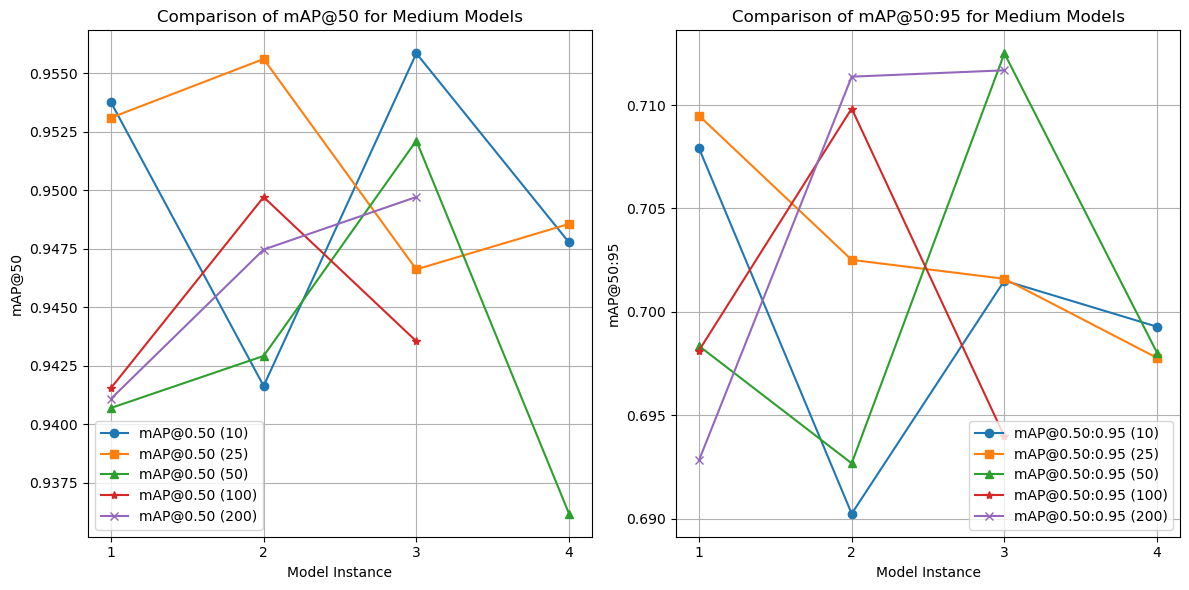

In [15]:

# Convert the lists of evaluation results into DataFrames
df_m_10 = pd.DataFrame(evaluation_results_m_10)
df_m_25 = pd.DataFrame(evaluation_results_m_25)
df_m_50 = pd.DataFrame(evaluation_results_m_50)
df_m_100 = pd.DataFrame(evaluation_results_m_100)
df_m_200 = pd.DataFrame(evaluation_results_m_200)

# Specific model labels corresponding to data sizes
model_labels = ['10', '25', '50', '100', '200']


plt.figure(figsize=(12, 6))

# mAP@0.50 Plot for Medium models
plt.subplot(1, 2, 1)
plt.plot(df_m_10['mAP@50'], '-o', label='mAP@0.50 (10)')
plt.plot(df_m_25['mAP@50'], '-s', label='mAP@0.50 (25)')
plt.plot(df_m_50['mAP@50'], '-^', label='mAP@0.50 (50)')
plt.plot(df_m_100['mAP@50'], '-*', label='mAP@0.50 (100)')
plt.plot(df_m_200['mAP@50'], '-x', label='mAP@0.50 (200)')
plt.title('Comparison of mAP@50 for Medium Models')
plt.xlabel('Model Instance')
plt.ylabel('mAP@50')
plt.xticks(range(len(df_m_10)), range(1, len(df_m_10) + 1))
plt.legend()
plt.grid(True)

# mAP@0.50:0.95 Plot for Medium models
plt.subplot(1, 2, 2)
plt.plot(df_m_10['mAP@50:95'], '-o', label='mAP@0.50:0.95 (10)')
plt.plot(df_m_25['mAP@50:95'], '-s', label='mAP@0.50:0.95 (25)')
plt.plot(df_m_50['mAP@50:95'], '-^', label='mAP@0.50:0.95 (50)')
plt.plot(df_m_100['mAP@50:95'], '-*', label='mAP@0.50:0.95 (100)')
plt.plot(df_m_200['mAP@50:95'], '-x', label='mAP@0.50:0.95 (200)')
plt.title('Comparison of mAP@50:95 for Medium Models')
plt.xlabel('Model Instance')
plt.ylabel('mAP@50:95')
plt.xticks(range(len(df_m_10)), range(1, len(df_m_10) + 1))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


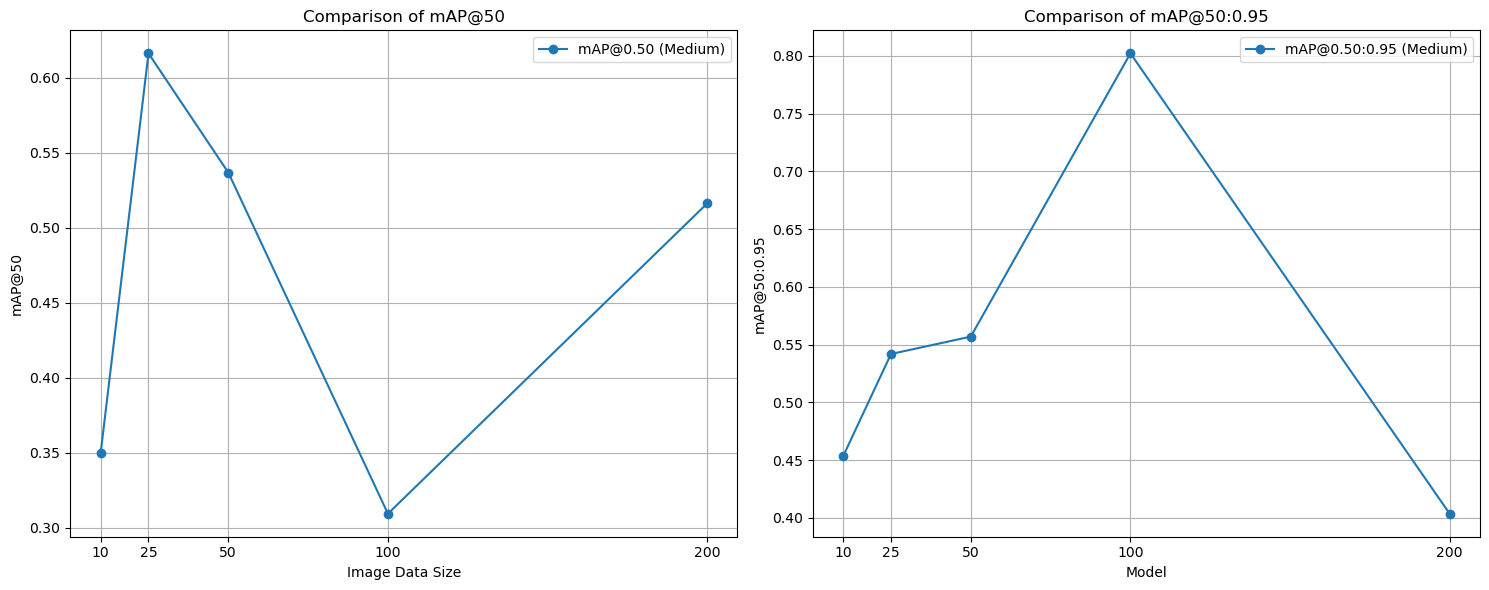

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example DataFrames for demonstration. Replace these with your actual DataFrames.
# Each DataFrame contains mAP scores for models of different instances (e.g., 4 fine-tuned models for '10' data size)
df_m_10 = pd.DataFrame({'mAP@50': np.random.rand(4), 'mAP@50:95': np.random.rand(4)})
df_m_25 = pd.DataFrame({'mAP@50': np.random.rand(4), 'mAP@50:95': np.random.rand(4)})
df_m_50 = pd.DataFrame({'mAP@50': np.random.rand(4), 'mAP@50:95': np.random.rand(4)})
df_m_100 = pd.DataFrame({'mAP@50': np.random.rand(3), 'mAP@50:95': np.random.rand(3)})
df_m_200 = pd.DataFrame({'mAP@50': np.random.rand(3), 'mAP@50:95': np.random.rand(3)})

# Similarly for 'Small' and 'Large' models

# Calculate the mean performance for each data size for Medium models
mean_performance_m = [
    df_m_10['mAP@50'].mean(), df_m_25['mAP@50'].mean(),
    df_m_50['mAP@50'].mean(), df_m_100['mAP@50'].mean(),
    df_m_200['mAP@50'].mean()
]

# Similarly calculate for 'Small' and 'Large' models
# mean_performance_s = [...]
# mean_performance_l = [...]

# Data sizes corresponding to each mean
data_sizes = [10, 25, 50, 100, 200]

# Plotting the average mAP@0.50 for Small, Medium, and Large models
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
#plt.plot(data_sizes, mean_performance_s, '-o', label='mAP@0.50 (Small)')
plt.plot(data_sizes, mean_performance_m, '-o', label='mAP@0.50 (Medium)')
#plt.plot(data_sizes, mean_performance_l, '-o', label='mAP@0.50 (Large)')
plt.title('Comparison of mAP@50')
plt.xlabel('Image Data Size')
plt.ylabel('mAP@50')
plt.xticks(data_sizes)
plt.legend()
plt.grid(True)

# Now for mAP@50:95
mean_performance_m_50_95 = [
    df_m_10['mAP@50:95'].mean(), df_m_25['mAP@50:95'].mean(),
    df_m_50['mAP@50:95'].mean(), df_m_100['mAP@50:95'].mean(),
    df_m_200['mAP@50:95'].mean()
]

# Similarly calculate for 'Small' and 'Large' models
# mean_performance_s_50_95 = [...]
# mean_performance_l_50_95 = [...]

plt.subplot(1, 2, 2)
#plt.plot(data_sizes, mean_performance_s_50_95, '-o', label='mAP@0.50:0.95 (Small)')
plt.plot(data_sizes, mean_performance_m_50_95, '-o', label='mAP@0.50:0.95 (Medium)')
#plt.plot(data_sizes, mean_performance_l_50_95, '-o', label='mAP@0.50:0.95 (Large)')
plt.title('Comparison of mAP@50:0.95')
plt.xlabel('Model')
plt.ylabel('mAP@50:0.95')
plt.xticks(data_sizes)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [25]:
df_evaluation_results_m10 = pd.DataFrame(evaluation_results_m_10)
df_evaluation_results_m25 = pd.DataFrame(evaluation_results_m_25)
df_evaluation_results_m50 = pd.DataFrame(evaluation_results_m_50)
df_evaluation_results_m100 = pd.DataFrame(evaluation_results_m_100)
df_evaluation_results_m200 = pd.DataFrame(evaluation_results_m_200)

# Calculate the mean for mAP@50 and mAP@50:95
mean_mAP_50_m10 = df_evaluation_results_m10['mAP@50'].mean()
mean_mAP_50_95_m10 = df_evaluation_results_m10['mAP@50:95'].mean()

mean_mAP_50_m125 = df_evaluation_results_m25['mAP@50'].mean()
mean_mAP_50_95_m25 = df_evaluation_results_m25['mAP@50:95'].mean()

mean_mAP_50_m50 = df_evaluation_results_m50['mAP@50'].mean()
mean_mAP_50_95_m50 = df_evaluation_results_m50['mAP@50:95'].mean()
mean_mAP_50_m100 = df_evaluation_results_m100['mAP@50'].mean()
mean_mAP_50_95_m100 = df_evaluation_results_m100['mAP@50:95'].mean()
mean_mAP_50_m200 = df_evaluation_results_m200['mAP@50'].mean()
mean_mAP_50_95_m200 = df_evaluation_results_m200['mAP@50:95'].mean()



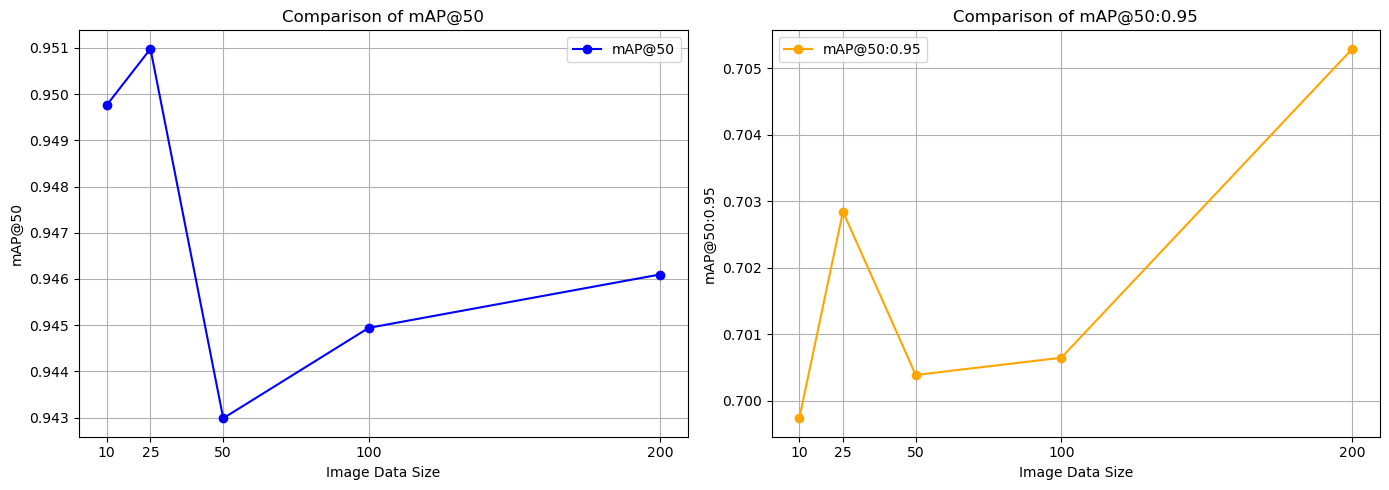

In [26]:
import matplotlib.pyplot as plt

# Given mean mAP@50 and mAP@50:95 values for different model data sizes
mean_mAP_50_values = [mean_mAP_50_m10, mean_mAP_50_m125, mean_mAP_50_m50, mean_mAP_50_m100, mean_mAP_50_m200]
mean_mAP_50_95_values = [mean_mAP_50_95_m10, mean_mAP_50_95_m25, mean_mAP_50_95_m50, mean_mAP_50_95_m100, mean_mAP_50_95_m200]
data_sizes = [10, 25, 50, 100, 200]

# Plotting the average mAP@50 and mAP@50:95 for different data sizes
plt.figure(figsize=(14, 5))

# Plot for mAP@50
plt.subplot(1, 2, 1)
plt.plot(data_sizes, mean_mAP_50_values, marker='o', linestyle='-', color='blue', label='mAP@50')
plt.title('Comparison of mAP@50')
plt.xlabel('Image Data Size')
plt.ylabel('mAP@50')
plt.xticks(data_sizes)
plt.grid(True)
plt.legend()

# Plot for mAP@50:95
plt.subplot(1, 2, 2)
plt.plot(data_sizes, mean_mAP_50_95_values, marker='o', linestyle='-', color='orange', label='mAP@50:0.95')
plt.title('Comparison of mAP@50:0.95')
plt.xlabel('Image Data Size')
plt.ylabel('mAP@50:0.95')
plt.xticks(data_sizes)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
